# Loan Risk Assessment - by Anns Rahim and Sankalp Gupta

### This is an EDA exercise to determine the driving factors behind loan default 

#### <font color=blue> Step 1: </font> Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
print("Python version: {}".format(sys.version))

print ("Pandas version: {}".format(pd.__version__))
print ("NumPy version: {}".format(np.__version__))

import matplotlib
print ("Matplotlib version: {}".format(matplotlib.__version__))

print ("Seaborn version: {}".format(sns.__version__))

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas version: 1.3.4
NumPy version: 1.20.3
Matplotlib version: 3.4.3
Seaborn version: 0.11.2


#### <font color=blue> Step 2: </font> Read the csv file and understand its attributes

In [3]:
loans_data = pd.read_csv ('loan.csv', delimiter=',', encoding='ISO-8859-1', low_memory=False)

In [4]:
loans_data.info(verbose=True) 
#Without verbose=True, info is not listing the column names, perhaps because there are 111 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

> <font color=red> NOTE: </font> <font color=blue> The order of attributes in the dataset and the order of attributes in the data dictionary does not match. In the data dictionary, the attributes are listed in alphabetical order. To make it more readable, the data dictionary needs to be aligned with the dataset. One can use the column numbering from above to rearrange the data dictionary. Very lengthy and painstaking process, but essential </font>

In [5]:
loans_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### <font color=blue> Step 3: </font> Handling Null Values, Single Value and all Unique Value columns

#### <font color=blue> Step 3.1: </font>Null Values

In [6]:
nullvals = pd.DataFrame (loans_data.isnull().sum())
nullvals [ nullvals[0] != 0].shape

(68, 1)

> <font color=red> NOTE: <font color=blue> There are many null columns. Many are likely to be totally empty </font>

In [7]:
nullvals [nullvals[0]==loans_data.shape[0]].shape

(54, 1)

In [8]:
loans_data.dropna (axis=1, how='all', inplace=True)
loans_data.shape

(39717, 57)

In [9]:
nullvals = pd.DataFrame (loans_data.isnull().sum())
nullvals [ nullvals[0] != 0]

,0
emp_title,2459
emp_length,1075
desc,12940
title,11
mths_since_last_delinq,25682
mths_since_last_record,36931
revol_util,50
last_pymnt_d,71
next_pymnt_d,38577
last_credit_pull_d,2


> <font color=red> NOTE: </font> <font color=blue> 54 columns dropped as they contained only Nulls. 57 columns left </font>
> <p> <font color=blue> We can also drop mths_since_last_record and next_pymnt_d as they too are mostly null </font> </p>

In [10]:
(36931/39717)*100

92.98537150338646

In [11]:
loans_data.drop (['mths_since_last_record'], axis=1, inplace=True)

In [12]:
(38577/39717)*100

97.12969257496789

In [13]:
loans_data.drop (['next_pymnt_d'], axis=1, inplace=True)

> <p> <font color=blue> But, we need to analyse mths_since_last_delinq before dropping </font> </p>

In [14]:
loans_data[~loans_data['mths_since_last_delinq'].isnull()]['loan_status'].value_counts()

Fully Paid     11530
Charged Off     2142
Current          363
Name: loan_status, dtype: int64

In [15]:
loans_data[loans_data['mths_since_last_delinq'].isnull()]['loan_status'].value_counts()

Fully Paid     21420
Charged Off     3485
Current          777
Name: loan_status, dtype: int64

> <font color=red> NOTE: </font> <font color=blue> Clearly this column is inconsistent as there are Charged Offs for rows that have null values in mths_since_last_delinq. So its best to drop it </font>

In [16]:
loans_data.drop (['mths_since_last_delinq'], axis=1, inplace=True)
loans_data.shape

(39717, 54)

#### <font color=blue> Step 3.2: </font> Columns with only a single value

In [17]:
uniques = pd.DataFrame (loans_data.nunique())

In [18]:
uniques[ uniques[0]==1 ].shape

(9, 1)

In [19]:
loans_data.drop (uniques[ uniques[0]==1 ].index, axis=1, inplace=True)
loans_data.shape

(39717, 45)

> <font color=red> NOTE: </font> <font color=blue> 9 columns containing a Single Value dropped. 45 columns left </font>

#### <font color=blue> Step 3.3: </font> Drop columns which are all unique. Not possible to do any kind of aggregation on them

In [20]:
uniques[ uniques[0]==loans_data.shape[0] ].shape

(3, 1)

In [21]:
loans_data.drop (uniques[ uniques[0]==loans_data.shape[0] ].index, axis=1, inplace=True)
loans_data.shape

(39717, 42)

> <font color=red> NOTE: </font> <font color=blue> 3 columns containing all uniques dropped. 42 columns left </font>

#### <font color=blue> Step 3.4: </font> Check other columns of no practical use and drop them

In [22]:
len(loans_data['emp_title'].unique())

28821

In [23]:
loans_data['emp_title'].head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [24]:
(28821/39717)*100

72.56590376916685

In [25]:
loans_data.drop (['emp_title'], axis=1, inplace=True)

> <font color=red> NOTE: </font> <font color=blue>Emp Title: A descriptive String. Nearly 73% unique values. Not useful for any kind of analysis. Dropped</font>

In [26]:
len(loans_data['title'].unique())

19616

In [27]:
loans_data['title'].head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

In [28]:
loans_data.drop (['title'], axis=1, inplace=True)

> <font color=red> NOTE: </font> <font color=blue>Title: Purpose of Loan. There is a better column for this, called purpose. Hence, has little analysis impact. Dropped</font>

In [29]:
loans_data['desc'].nunique()

26527

In [30]:
loans_data.drop(['desc'], axis=1, inplace=True)

> <font color=red> NOTE: </font> <font color=blue>Desc: Purpose of Loan. There is a better column for this, called purpose. Hence, has little analysis impact. Dropped</font>

In [31]:
loans_data.shape

(39717, 39)

> <font color=red> NOTE: </font> <font color=blue> 5 columns containing only descriptive data dropped. 39 columns left </font>

#### <font color=blue> Step 3.5: </font> Drop columns that are related to customer behaviour after loan disbursement

In [32]:
behavior_cols = ['delinq_2yrs', 'earliest_cr_line', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 
                 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
loans_data.drop(behavior_cols, axis=1, inplace=True)
loans_data.shape

(39717, 23)

> <font color=red> NOTE: </font> <font color=blue> 16 columns containing only behavior data dropped. 23 columns left </font>

#### <font color=blue> Step 4: </font> Correct Data Types of Numeric and DataTime columns

In [33]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

#### <font color=blue> Step 4.1: </font> Numeric Columns

In [34]:
loans_data.loc[:, ['term', 'int_rate', 'emp_length', 'zip_code']].head()

,term,int_rate,emp_length,zip_code
0,36 months,10.65%,10+ years,860xx
1,60 months,15.27%,< 1 year,309xx
2,36 months,15.96%,10+ years,606xx
3,36 months,13.49%,10+ years,917xx
4,60 months,12.69%,1 year,972xx


In [35]:
# Make the term column a numeric column by removing 'months' and changing its datatype to int
loans_data['term'] = loans_data['term'].apply (lambda x: x[0:3]).astype('int64')

In [36]:
# Make the int_rate column a numeric column by removing '%' and changing its datatype to float
loans_data['int_rate'] = loans_data['int_rate'].apply (lambda x: x[0:-1]).astype('float64')

> <font color=red> NOTE: </font>
> <p> <font color=blue> 1. Two columns: Term and Interest Rate - converted to numeric </font> </p>
> <p> <font color=blue> 2. No need to change Employment Length, as it is a good categorical column as it is </font> </p>
> <p> <font color=blue> 3. No need to change Zip Code, as it is a good categorical column as it is </font> </p>

#### <font color=blue> Step 4.2: </font> Date Columns

In [37]:
# See all date columns
loans_data.loc[:, ['issue_d']].head()

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
4,Dec-11


In [38]:
#Change all above date columns to MM-YYYY format and covert them to datetime datatype
def change_date (x):
    if pd.notnull(x):
        m = x[0:3]
        y = int(x[-2:])
        
        if y > 22:
            y = 1900 + y
        else:
            y = 2000 + y
        
        x = m + '-' + str(y)
    
    return x

In [39]:
loans_data ['issue_d'] = pd.to_datetime (loans_data ['issue_d'].apply (change_date), format='%b-%Y')

In [40]:
loans_data[['issue_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   issue_d  39717 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 310.4 KB


In [41]:
loans_data['IssuedYear'] = loans_data['issue_d'].dt.year

In [42]:
loans_data['IssuedMonth'] = loans_data['issue_d'].dt.month

> <font color=red> NOTE: </font> <font color=blue> Changed 1 column to DateTime with MMM-YY date format, by first converting them to MM-YYYY format </font>
> <p> <font color=blue> Also created 2 new columns: Loan Issued Year and Month - to check if there is any trend over years or months </font> </p> 

#### <font color=blue> Step 5: </font> Data Understanding

#### <font color=blue> Step 5.1 </font> Loan Amount vs Funded Amount vs Funded Amount Investor
> <p> <font color=blue> loan_amnt: The loan requested by the borrower </font> </p>
> <p> <font color=blue> funded_amnt: The amount committed by the financial institution. </font> </p>
> <p> <font color=blue> funded_amnt_inv: The amount actually disbursed to the borrower </font> </p>

> <font color=green> <u> Note that this study will involve both <b> univariate </b> and <b> multivariate </b> analysis

In [43]:
loans_data.loc [:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].head()

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000,5000,4975.0
1,2500,2500,2500.0
2,2400,2400,2400.0
3,10000,10000,10000.0
4,3000,3000,3000.0


> <font color=red> NOTE: </font> <font color=blue> Notice that All 3 columns have similar values </font>

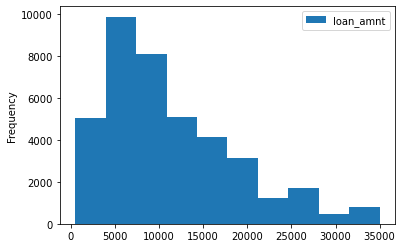

In [44]:
loans_data[['loan_amnt']].plot.hist()
plt.show()

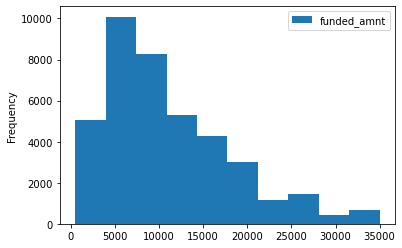

In [45]:
loans_data[['funded_amnt']].plot.hist()
plt.show()

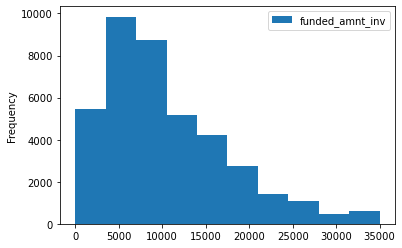

In [46]:
loans_data[['funded_amnt_inv']].plot.hist()
plt.show()

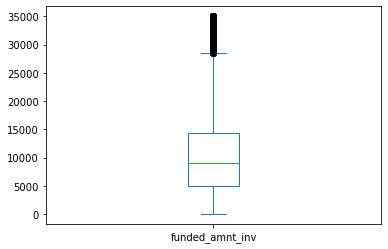

In [47]:
loans_data[['funded_amnt_inv']].plot.box()
plt.show()

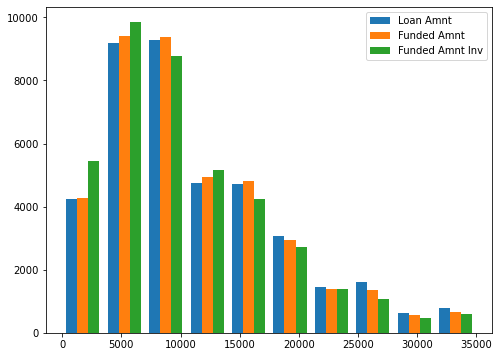

In [48]:
plt.figure(figsize=(8,6))
plt.hist (loans_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']])
plt.legend(["Loan Amnt", "Funded Amnt", "Funded Amnt Inv"], loc ="upper right")
plt.show()

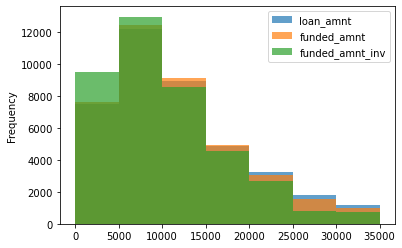

In [49]:
loans_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].plot.hist(bins=7, alpha=0.7)
plt.show()

In [50]:
loans_data [ loans_data['funded_amnt'] > loans_data['loan_amnt'] ].shape

(0, 25)

In [51]:
loans_data [ loans_data['funded_amnt_inv'] > loans_data['loan_amnt'] ].shape

(0, 25)

In [52]:
loans_data [ loans_data['funded_amnt_inv'] > loans_data['funded_amnt'] ].shape

(0, 25)

> <font color=red> NOTE: </font> 
> <p> <font color=blue> 1. From the above 5 histograms, we can see that the 3 columns, loan_amnt, funded_amnt, funded_amnt_inv have similar value ranges. </font> </p>
> <p> <font color=blue> 2. We also note that the Funded Amt Inv &lt Funded Amt &lt Loan Amt. However the last 2 histograms seem to suggest otherwise. This is a fallacy. The reason is that the last 2 histograms are putting different rows in different bins for each of the three cases. Hence, these histograms should be ignored. </font> </p>
> <p> <font color=blue> 3. Finally, we can conclude that since the Funded Amount by Investor (funded_amnt_inv) is the actual loan disbursed, this should be the basis of all further analysis. </font> </p>

> <font color=red> NOTE: </font> <font color=blue> Before moving further, we should do some more processing on the loan amount: </font>
> <p> <font color=blue> 1. We should analyse what % of loan amount requested was actually funded </font> </p>
> <p> <font color=blue> 2. Since funded amount by investor is a continuous variable, it would make sense to bin it for further analysis </font> </p>

In [53]:
#Create a Percentage Column for Committed Funds : % of Committed Funds vs Loan Requested
loans_data ['FundedPercent'] = loans_data ['funded_amnt'] * 100 / loans_data['loan_amnt']
loans_data ['FundedPercent'] = loans_data ['FundedPercent'].round(2)

In [54]:
#Create bins for Percentage Column for Committed Funds
fpbins = (0,20,40,60,80,99.99,100)
fplabels = ('0-20%', '20-40%', '40-60%', '60-80%', '80-99.99%', '100%')
loans_data ['FundedPercent_Bins'] = pd.cut (loans_data['FundedPercent'], fpbins, labels=fplabels, include_lowest=True)

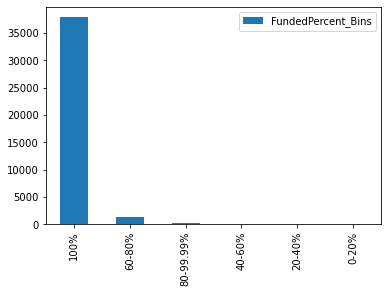

In [55]:
pd.DataFrame(loans_data['FundedPercent_Bins'].value_counts()).plot.bar()
plt.show()

In [56]:
#Create a Percentage Column for Disbursed Funds : % of Disbursed Funds vs Loan Requested
loans_data ['FundedInvPercent'] = loans_data ['funded_amnt_inv'] * 100 / loans_data['loan_amnt']
loans_data ['FundedInvPercent'] = loans_data ['FundedInvPercent'].round(2)

In [57]:
#Create bins for Percentage Column for Disbursed Funds
fpbins = (0,20,40,60,80,99.99,100)
fplabels = ('0-20%', '20-40%', '40-60%', '60-80%', '80-99.99%', '100%')
loans_data ['FundedInvPercent_Bins'] = pd.cut (loans_data['FundedInvPercent'], fpbins, labels=fplabels, include_lowest=True)

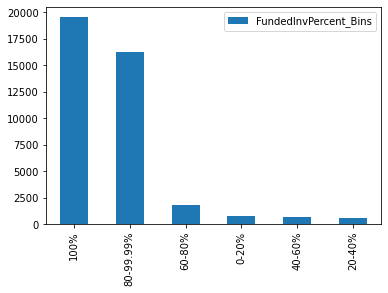

In [58]:
pd.DataFrame(loans_data['FundedInvPercent_Bins'].value_counts()).plot.bar()
plt.show()

> <font color=red> NOTE: </font> <font color=blue> Clearly, it is evident from the above two plots that Committed Funds (funded_amnt) is more or less 100%, ie, same as Loan requested, whereas actual disbursement (funded_amnt_inv) does have some variation, which could be of interest later when we analyse it against loan status </font>
> <p> <font color=blue> Hence there is no need for Committed funds % and its associated bins. We can also drop redundant columns of loan_amnt and funded_amnd </font> </p>

In [59]:
#Drop derived column FundedPercent as it is not required.
#Also dropped FundedInvPercent as it has already been used to derive the bins
loans_data.drop(['FundedPercent_Bins', 'FundedPercent', 'loan_amnt', 'funded_amnt', 'FundedInvPercent'], axis=1, inplace=True)
loans_data.shape

(39717, 24)

In [60]:
#Just like Funded % Bins, we will also create Bins of Disbursed Funds (funded_amnt_inv)
amnt_labels = ['Upto 5K', '5-10K', '10-15K', '15-20K', '20-25K', '25-30K', '30-35K']               
loans_data['FundedAmntInv_Bins'] = pd.cut (loans_data['funded_amnt_inv'], bins=7, labels=amnt_labels)

#### <font color=blue> Step 5.2 </font> Annual Income
> <font color=blue> annual_inc : The self-reported annual income provided by the borrower during registration. Note that it not only has a lot of outliers, their values are way bigger than most other rows </font>

> <font color=green> <b> <u> Note that this study will involve <b> univariate </b> analysis

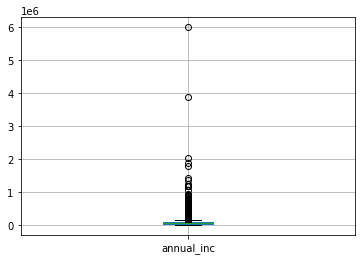

In [61]:
loans_data.boxplot(column=['annual_inc'])
plt.show()

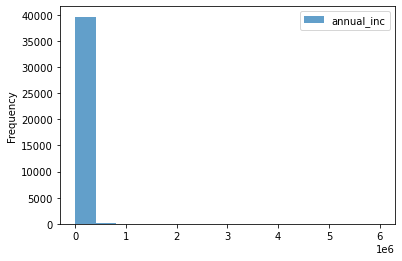

In [62]:
loans_data[['annual_inc']].plot.hist(bins=15, alpha=0.7)
plt.show()

In [63]:
avg = loans_data[['annual_inc']].mean()
mid = loans_data[['annual_inc']].median()
high = loans_data[['annual_inc']].max()

print (avg, mid, high)

annual_inc    68968.926377
dtype: float64 annual_inc    59000.0
dtype: float64 annual_inc    6000000.0
dtype: float64


> <font color=red> NOTE: </font> <font color=blue> Clearly most of the values are below 100K. We can divide the data into 3 parts. 0-100K, 100K-1Million and Above 1Million </font>

In [64]:
ann_inc_high = loans_data[ (loans_data['annual_inc'] > 100000) & (loans_data['annual_inc'] <= 1000000) ]
ann_inc_high.shape

(5673, 25)

In [65]:
ann_inc_v_high = loans_data [loans_data['annual_inc'] > 1000000]
ann_inc_v_high.shape

(14, 25)

In [66]:
loans_data = loans_data[ loans_data['annual_inc'] <= 100000]

> <font color=red> NOTE: </font> <font color=blue> Now we can bin data below 100K, and then join it with the other 2 parts seperated earlier </font>

In [67]:
inc_labels = ['0-25K', '25-42K', '42-62K', '62-82K', '82K-100K']               
loans_data['Income_Bins'] = pd.cut (loans_data['annual_inc'], bins=5, labels=inc_labels)

In [68]:
ann_inc_high ['Income_Bins'] = '100K-Mil'

In [69]:
ann_inc_v_high ['Income_Bins'] = 'Above Mil'

In [70]:
loans_data = pd.concat ([loans_data, ann_inc_high, ann_inc_v_high])

In [71]:
loans_data.shape

(39717, 26)

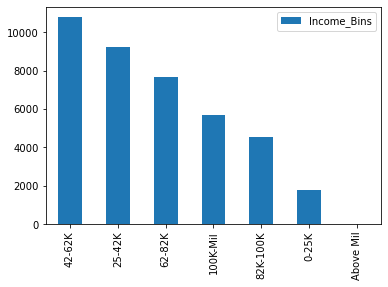

In [72]:
pd.DataFrame(loans_data['Income_Bins'].value_counts()).plot.bar()
plt.show()

> <font color=red> NOTE: </font> <font color=blue> There were some outliers in Annual Income. Instead of deleting them, we segmented them into a separate bin </font>

#### <font color=blue> Step 5.3 </font> Employment Length
> <font color=blue> emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. </font> 

> <font color=green> <b> <u> Note that this study will involve <b> univariate </b> analysis

In [73]:
loans_data['emp_length'].isna().sum()

1075

In [74]:
loans_data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

<AxesSubplot:>

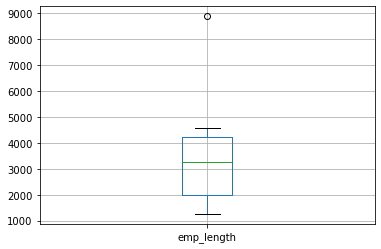

In [75]:
df = pd.DataFrame (loans_data['emp_length'].value_counts())
df.boxplot()

> <font color=red> NOTE: </font> <font color=blue> There were some nulls in Employment Length column. We decided not to delete them. Their effect will be ignored in overall analysis. However, if we delete them, then there is a possibility that other important columns of such rows will also be deleted. </font>
> <p> <font color=blue> We also note that there is one outlier, '10+years', but it need not be deleted either </font> </p>

#### <font color=blue> Step 5.4 </font> Zip Codes
> <font color=blue> zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application. </font>

> <font color=green> <b> <u> Note that this study will involve <b> univariate </b> analysis

In [76]:
loans_data['zip_code'].isna().sum()

0

In [77]:
df = pd.DataFrame (loans_data['zip_code'].value_counts())
df

,zip_code
100xx,597
945xx,545
112xx,516
606xx,503
070xx,473
...,...
252xx,1
388xx,1
386xx,1
739xx,1


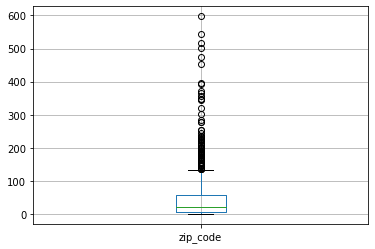

In [78]:
df.boxplot()
plt.show()

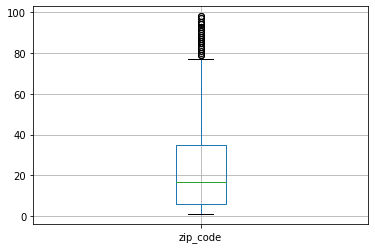

In [79]:
df[df['zip_code'] < 100].boxplot()
plt.show()

In [80]:
df[df['zip_code'] < 70].shape

(656, 1)

In [81]:
df[(df['zip_code'] > 70) & (df['zip_code'] < 100)].shape

(50, 1)

In [82]:
df[(df['zip_code'] > 100) & (df['zip_code'] < 600)].shape

(110, 1)

In [83]:
df[df['zip_code'] == 1].shape

(55, 1)

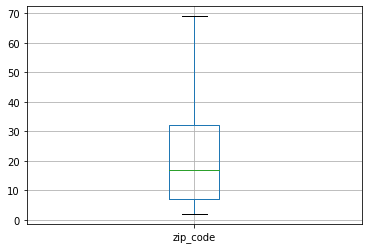

In [84]:
df[(df['zip_code'] > 1) & (df['zip_code'] < 70)].boxplot()
plt.show()

> <font color=red> NOTE: </font> <font color=blue> There were no nulls in Zip Code column. But there are outliers, both at the bottom as well as the top. However, we will not delete them, since there is a possibility that other important columns of such rows will also be deleted. But when we analyse Loan Status against Zip Code, we will segment these outliers separately </font>

#### <font color=blue> Step 5.5: </font> Loan Status
> <p> <font color=blue> loan_status: Most important column. Contains 3 values - Fully paid, Charged Off, Current </font> </p>
> <p> <font color=blue> Our main interest is in <u> Charged Off </u> - meaning Default on loan </font> </p>

> <font color=green> <b> <u> Note that this study will involve <b> univariate </b> analysis

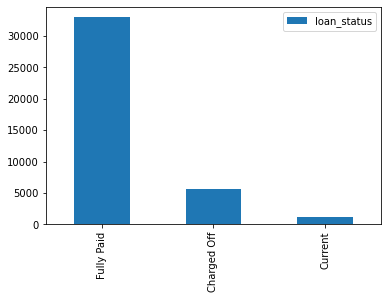

In [85]:
pd.DataFrame (loans_data['loan_status'].value_counts()).plot.bar()
plt.show()

In [86]:
loans_data.loc[loans_data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loans_data)

14.167736737417227

> <font color=red> NOTE: </font> <font color=blue> We can see that about 14% loans are Charged Off </font>   


#### <font color=blue> Step 5.6: </font> Verification Status
> <p> <font color=blue> verification_status : Indicates if applicant was verified or not by LC (Credit Team) </font> </p>

> <font color=green> <b> <u> Note that this study will involve <b> univariate </b> and <b> bivariate </b> analysis

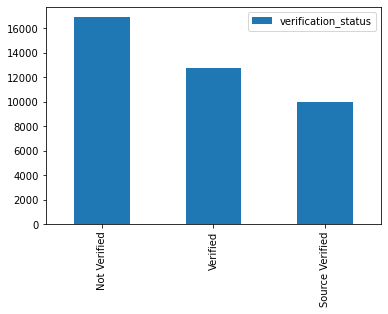

In [87]:
pd.DataFrame (loans_data['verification_status'].value_counts()).plot.bar()
plt.show()

In [88]:
loans_data.loc[loans_data['verification_status'] == 'Not Verified'].verification_status.count() * 100/len(loans_data)

42.60392275348088

> <font color=red> NOTE: </font> <font color=blue> Nearly 43% loans disbursed are not verified. That's huge </font>   

In [89]:
loans_data[loans_data['verification_status'] == 'Not Verified']['loan_status'].value_counts()

Fully Paid     14552
Charged Off     2142
Current          227
Name: loan_status, dtype: int64

In [90]:
2142*100 / (14552+2142+227)

12.658826310501743

In [91]:
loans_data[loans_data['verification_status'] != 'Not Verified']['loan_status'].value_counts()

Fully Paid     18398
Charged Off     3485
Current          913
Name: loan_status, dtype: int64

In [92]:
3485*100 / (18398+3485+913)

15.287769784172662

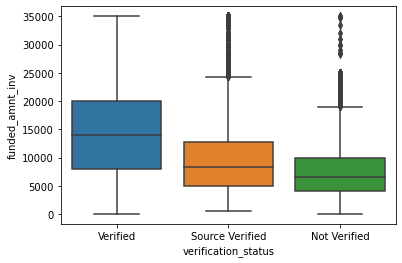

In [93]:
sns.boxplot(x='verification_status', y='funded_amnt_inv', data=loans_data)
plt.show()

> <font color=red> NOTE: </font> 
> <p> <font color=blue> It is strange that Not Verified loans have lesser percentage of defaults compare to verified loans </font>
> <p> <font color=blue> But it becomes clear when loan amount is compared with verification status on a box plot. Clearly unverified loans are those that have lower loan value, hence lesser chances of default </font> 

#### <font color=blue> Step 6: </font> Compare all attributes against loan status and see how they impact loan status
> <font color=green> <b> <u> Note that this study will involve <b> Mostly Bivariate </b> but sometimes <b> Multivariate </b> Analysis

In [94]:
#Create a Pivot Table with respect to Loan Status = Charged Off, where Charged Off is Percentage of Total Loans in the segment 
def status_pivot (col, l_data):
    df = l_data.pivot_table(index=col, columns='loan_status', values='funded_amnt_inv', aggfunc='count')
    df = df.fillna(0)
    df ['Total'] = df.sum(axis=1)
    for x in df.columns:
        df[x+'%'] = df[x] * 100 / df['Total']
    df = df.round(0)
    return df

#### <font color=blue> Step 6.1 </font> Disbursed Amount (funded_amnt_inv) against Loan Status

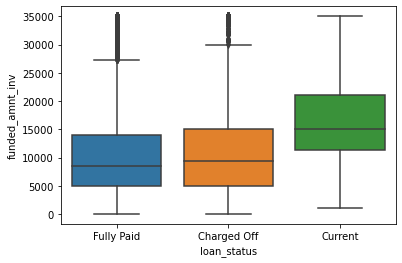

In [95]:
sns.boxplot (x='loan_status', y='funded_amnt_inv', data=loans_data)
plt.show()

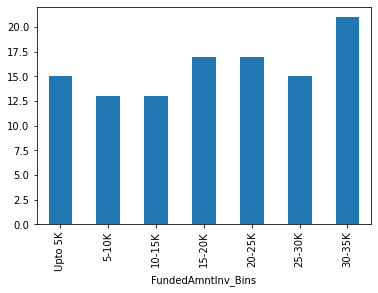

In [96]:
status_pivot ('FundedAmntInv_Bins', loans_data)['Charged Off%'].plot.bar()
plt.show()

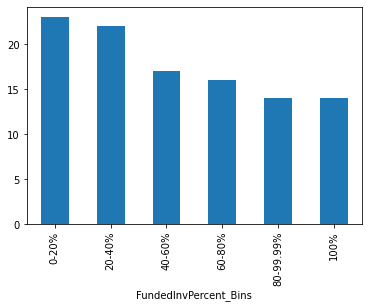

In [97]:
status_pivot ('FundedInvPercent_Bins', loans_data)['Charged Off%'].plot.bar()
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> Charged Offs (Defaults) are happening on slightly higher value loans compared to Fully Paid </font>
> <p> <font color=blue> Most of the current loans are of higher value than both fully paid and charged off loans </font>

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> There is some trend that higher the loan, higher the defaults </font>   
> <p> <font color=blue> But a bigger trend is that if loan is partially funded, then the chances of default are higher </font>

> <font color=red> CONCLUSION: </font> <br/>
> <p> <font color=blue> Its better to reject a loan completely, than to fund it partially </font>

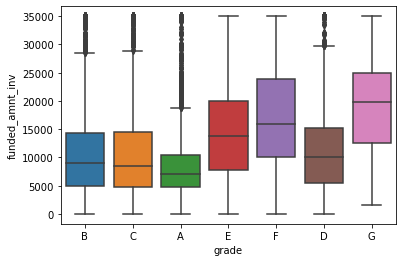

In [98]:
sns.boxplot(x='grade', y='funded_amnt_inv', data=loans_data)
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> As Loan Amount increases, Grade (ie Risk) increases from A to G </font>

#### <font color=blue> Step 6.2 </font> Loan Term, Interest Rate and Installment against Loan Status. 
> <p> <font color=blue> For any loan, all these 3 are dependent on each other and decided together

#### <font color=blue> Step 6.2.1 </font> Loan Term

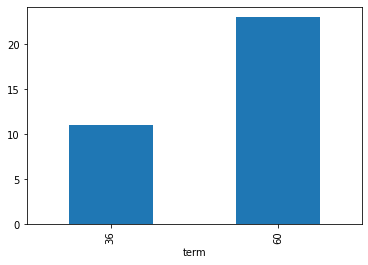

In [99]:
status_pivot ('term', loans_data)['Charged Off%'].plot.bar()
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> Higher the Loan term (tenure), higher % of people default </font>   

> <font color=red> CONCLUSION: </font> <br/>
> <p> <font color=blue> LC team should consider giving loans for a shorter tenure </font>

#### <font color=blue> Step 6.2.2 </font> Interest Rate

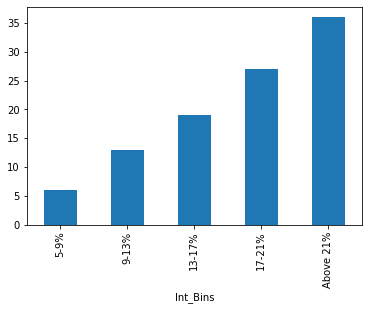

In [100]:
int_labels = ['5-9%', '9-13%', '13-17%', '17-21%', 'Above 21%']               
loans_data['Int_Bins'] = pd.cut (loans_data['int_rate'], bins=5, labels=int_labels)

status_pivot ('Int_Bins', loans_data)['Charged Off%'].plot.bar()
plt.show()

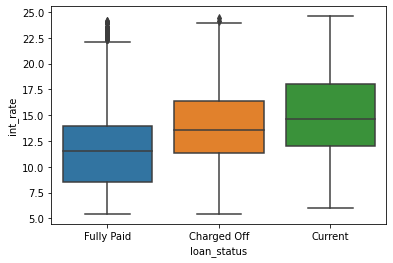

In [101]:
sns.boxplot(x='loan_status', y='int_rate', data=loans_data)
plt.show()

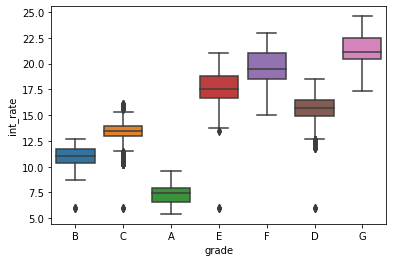

In [102]:
sns.boxplot(x='grade', y='int_rate', data=loans_data)
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> Charged Off Loans have a generally higher interest rate than Fully Paid. Surprisingly Current Loans have a higher rate of interest than Charged Off. But this can be understood, if we see the box plot in Section 6.1 above. Most current loans are also higher value loans, hence attracting a higher rate of interest. Looking at the trend of defaults, these could turn out to be potentially high risk loans </font>

> <p> <font color=blue> A comparison against grades also confirms that higher grade (higher risk) loans are charged higher rate of interest </font>

> <font color=red> CONCLUSION: </font> <br/>
> <p> <font color=blue> Clearly, higher the interest rate, higher chances of default. But since interest is a effect of higher risk rather than a cause of higher risk, it is clear that its a Catch-22 situation and has to be handled by LC team on a careful basis</font>

#### <font color=blue> Step 6.2.3 </font> Installment

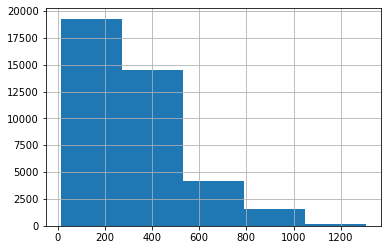

In [103]:
loans_data ['installment'].hist(bins=5)
plt.show()

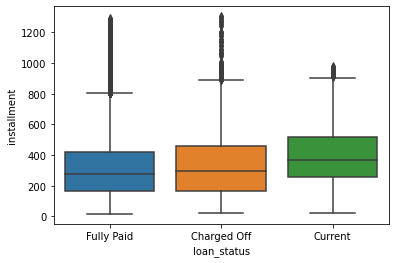

In [104]:
sns.boxplot(x='loan_status', y='installment', data=loans_data)
plt.show()

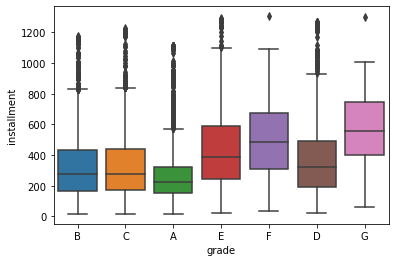

In [105]:
sns.boxplot(x='grade', y='installment', data=loans_data)
plt.show()

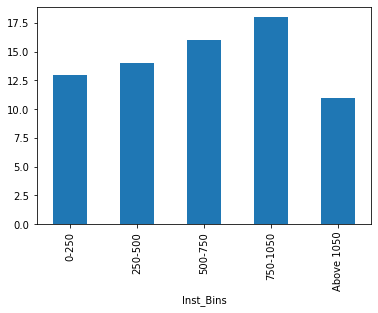

In [106]:
#Loan Installment against loan status
inst_labels = ['0-250', '250-500', '500-750', '750-1050', 'Above 1050']               
loans_data['Inst_Bins'] = pd.cut (loans_data['installment'], bins=5, labels=inst_labels)

status_pivot ('Inst_Bins', loans_data)['Charged Off%'].plot.bar()
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue>More people are defaulting as installment increases, BUT for installments above 1050, defaults are the lowest </font>
> <p> <font color=blue> Higher Grade (High Risk) Loans are also the ones with higher installments. </font>
> <p> <font color=blue> Installments are based on interest rate and tenure. Lower tenure OR higher interest rate means higher installment, which could also mean higher risk. We know from analysis of Term and Interest Rate, that lower term and Interest rate are less risky. But lower interest rate means lower profits too. </font>
    
> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> Its best to ignore this, as interest rate and tenure are better attributes for decision making </font>

#### <font color=blue> Step 6.3 </font> Annual Income, Employment Length, Home Ownership against Loan Status
> <p> <font color=blue> annual_inc: The self-reported annual income provided by the borrower during registration.
> <p> <font color=blue> emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
> <p> <font color=blue> home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

#### <font color=blue> Step 6.3.1 </font> Annual Income

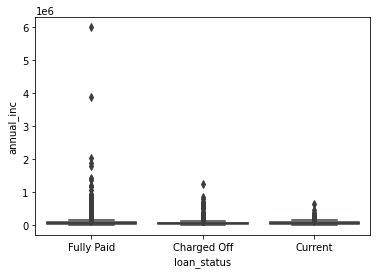

In [107]:
sns.boxplot(x='loan_status', y='annual_inc', data=loans_data)
plt.show()

> <font color=red> NOTE: </font> <font color=blue> Clearly there are very heavy outliers. This was also noted in Step 5.2 above </font>

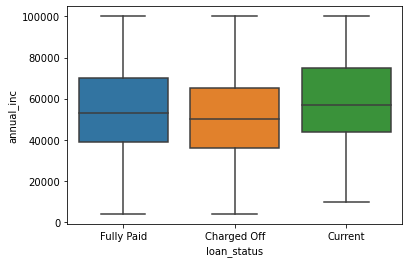

In [108]:
#Lets select incomes below 100K only
inc_below_100K = loans_data [loans_data['annual_inc'] < 100000]
sns.boxplot(x='loan_status', y='annual_inc', data=inc_below_100K)
plt.show()

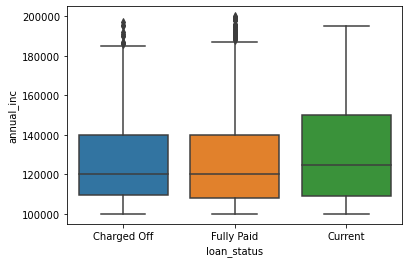

In [109]:
inc_below_200K = loans_data [(loans_data['annual_inc'] >= 100000) & (loans_data['annual_inc'] < 200000)]

sns.boxplot(x='loan_status',y='annual_inc',data=inc_below_200K)
plt.show()

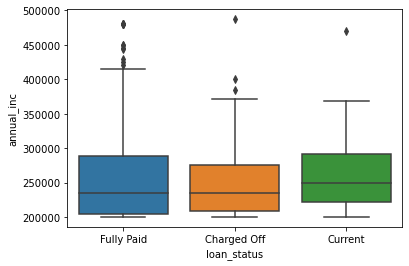

In [110]:
inc_below_500K = loans_data [(loans_data['annual_inc'] >= 200000) & (loans_data['annual_inc'] < 500000)]

sns.boxplot(x='loan_status',y='annual_inc',data=inc_below_500K)
plt.show()

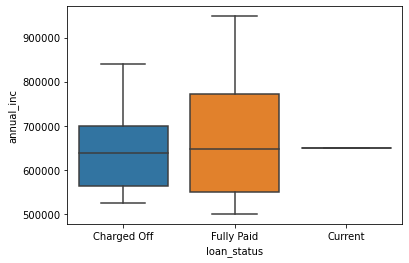

In [111]:
inc_below_1M = loans_data [(loans_data['annual_inc'] >= 500000) & (loans_data['annual_inc'] < 1000000)]

sns.boxplot(x='loan_status',y='annual_inc',data=inc_below_1M)
plt.show()

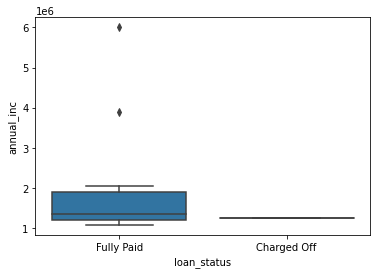

In [112]:
inc_above_1M = loans_data [(loans_data['annual_inc'] >= 1000000)]

sns.boxplot(x='loan_status',y='annual_inc',data=inc_above_1M)
plt.show()

> <font color=red> NOTE: </font><br />
> <p> <font color=blue> Income Below 100K: Defaults are happening at lower income levels
> <p> <font color=blue> 100K -500K: Defaults are similar to Fully Paid
> <p> <font color=blue> 500K -  1M: Defaults happening at higher income levels
> <p> <font color=blue> Above 1M  : No defaults happening
> <p> <font color=red> CONCLUSIONS: </font><br />
> <p> <font color=blue> LC team should consider incomes between 100-500K and above 1M as safer compared to incomes below 100K and between 500K to 1 Million

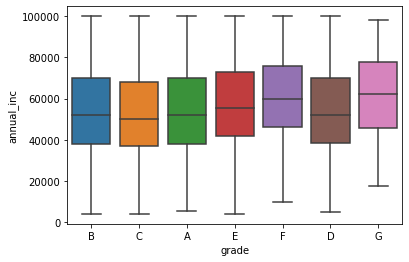

In [113]:
sns.boxplot(x='grade', y='annual_inc', data=inc_below_100K)
plt.show()

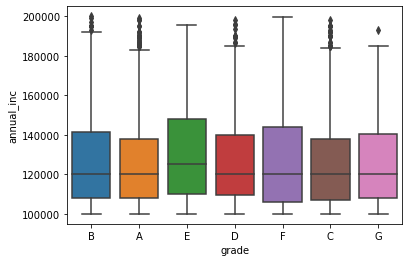

In [114]:
sns.boxplot(x='grade', y='annual_inc', data=inc_below_200K)
plt.show()

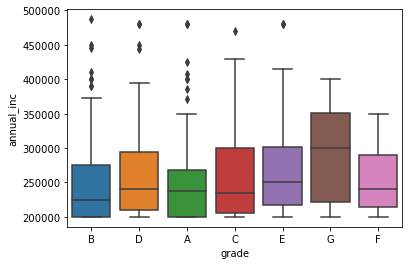

In [115]:
sns.boxplot(x='grade', y='annual_inc', data=inc_below_500K)
plt.show()

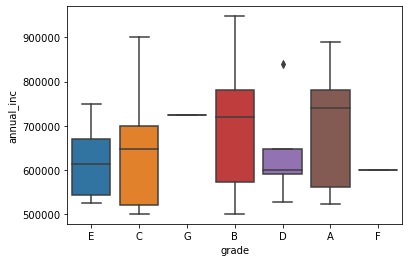

In [116]:
sns.boxplot(x='grade', y='annual_inc', data=inc_below_1M)
plt.show()

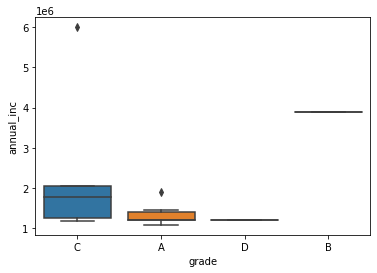

In [117]:
sns.boxplot(x='grade', y='annual_inc', data=inc_above_1M)
plt.show()

> <font color=red> NOTE: </font><br />
> <p> <font color=blue> Below 100K: Strangely Loan Grades (ie Risk) are increasing with increasing income. Perhaps this is because the loan amount is increasing with increasing income and hence higher risk for the bank

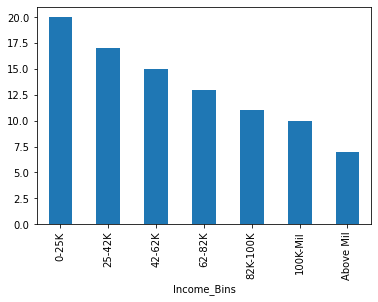

In [118]:
inc = status_pivot ('Income_Bins', loans_data)
inc.sort_values (by='Charged Off%', ascending=False)['Charged Off%'].plot.bar()
plt.show()

> <font color=red> CONCLUSION: </font> <font color=blue> Finally the above bar chart clearly demonstrates that as income levels decrease, % of people defaulting increases. Hence LC should consider lower income levels more risky for loans </font>

#### <font color=blue> Step 6.3.2 </font> Employment Length

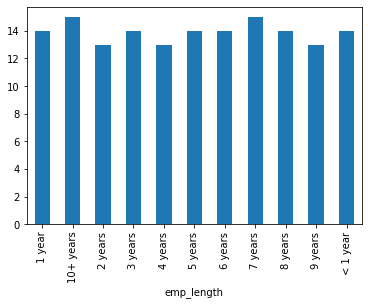

In [119]:
status_pivot ('emp_length', loans_data)['Charged Off%'].plot.bar()
plt.show()

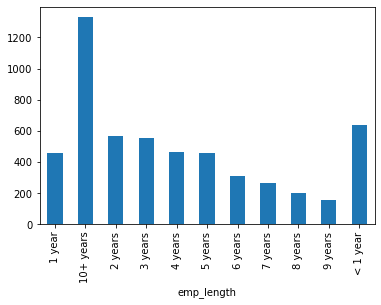

In [120]:
status_pivot ('emp_length', loans_data)['Charged Off'].plot.bar()
plt.show()

> <font color=red> NOTE: </font> <br/>
<font color=blue>Maximum defaults are in categories where employment lenght is 7 yrs and 10+ years, whereas minimum is 2yrs, 4yrs and 9 yrs </font>

#### <font color=blue> Step 6.3.3 </font> Home Ownership

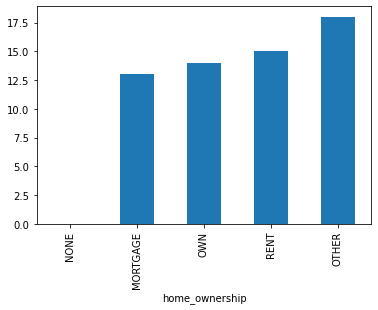

In [121]:
ho = status_pivot ('home_ownership', loans_data)
ho.sort_values (by='Charged Off%', ascending=True)['Charged Off%'].plot.bar()
plt.show()

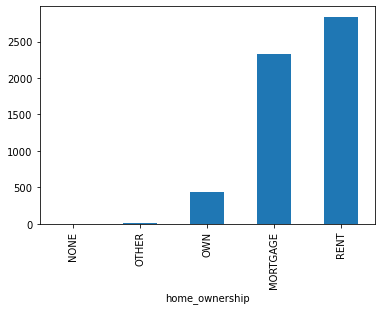

In [122]:
ho = status_pivot ('home_ownership', loans_data)
ho.sort_values (by='Charged Off', ascending=True)['Charged Off'].plot.bar()
plt.show()

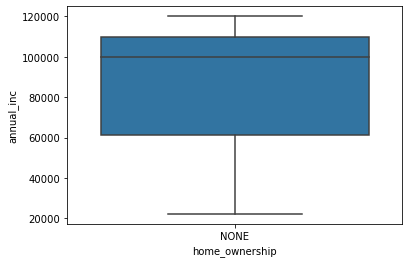

In [123]:
sns.boxplot(x='home_ownership', y='annual_inc', data=loans_data[loans_data['home_ownership']=='NONE'])
plt.show()

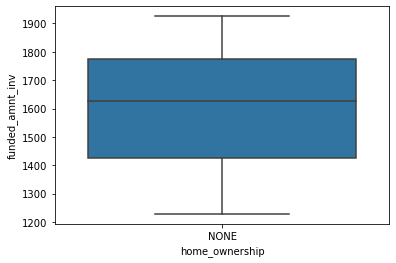

In [124]:
sns.boxplot(x='home_ownership', y='funded_amnt_inv', data=loans_data[loans_data['home_ownership']=='NONE'])
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> Maximum defaults are in categories where Home Ownership is mentioned as OTHER or RENT </font>
> <p> <font color=blue> Home Ownership of NONE has no defaults. After analysis of such cases compared to Loan Amount and Annual Income, it turns out that these are people who have middle income levels and have taken very low amount of loan, hence their defaults are literally ZERO. These people are also very few in number </font>

> <font color=red> CONCLUSION: </font> <br/>
> <p> <font color=blue> LC team should be careful giving loans to people whose Home Ownership is RENT or OTHER </font>

#### <font color=blue> Step 6.4 </font> Grade and Sub Grade against Loan Status

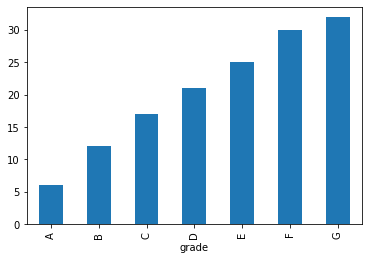

In [125]:
status_pivot ('grade', loans_data)['Charged Off%'].plot.bar()
plt.show()

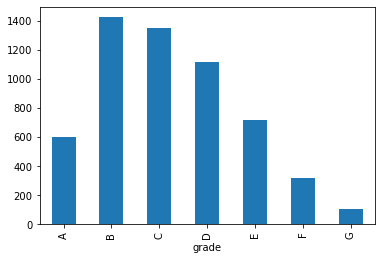

In [126]:
status_pivot ('grade', loans_data)['Charged Off'].plot.bar()
plt.show()

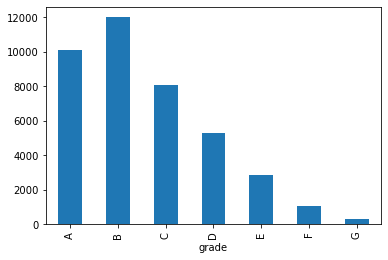

In [127]:
status_pivot ('grade', loans_data)['Total'].plot.bar()
plt.show()

> <font color=red> NOTE: </font> <br/>
> <p> <font color=blue> Higher the Grade, higher the Defaults. Clearly grading is done based on how risky the loan is </font>

> <font color=red> CONCLUSION: </font> <br/>
> <p> <font color=blue> Grading is not an input parameter, but an output of loan risk assessment


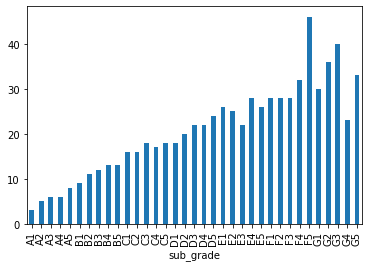

In [128]:
status_pivot ('sub_grade', loans_data)['Charged Off%'].plot.bar()
plt.show()

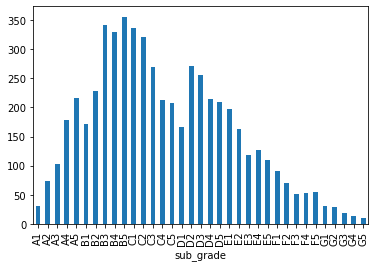

In [129]:
status_pivot ('sub_grade', loans_data)['Charged Off'].plot.bar()
plt.show()

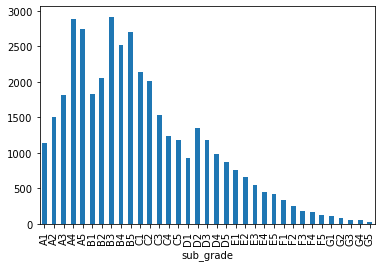

In [130]:
status_pivot ('sub_grade', loans_data)['Total'].plot.bar()
plt.show()

> <font color=red> NOTE: </font><br />
> <p> <font color=blue> Similar trend as grading, except E3 and from F5 to G4 </font>  
> <p> <font color=blue> Once again, this is an output parameter and not an input parameter </font>  

#### <font color=blue> Step 6.5 </font> Verification Status against Loan Status

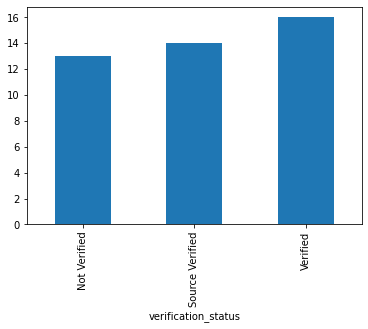

In [131]:
status_pivot ('verification_status', loans_data)['Charged Off%'].plot.bar()
plt.show()

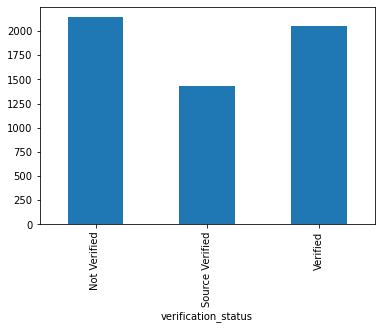

In [132]:
status_pivot ('verification_status', loans_data)['Charged Off'].plot.bar()
plt.show()

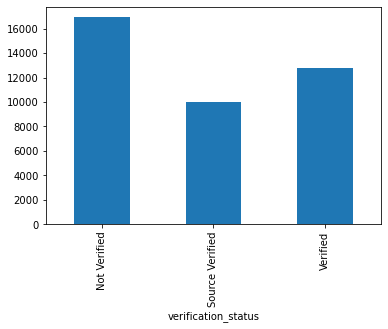

In [133]:
status_pivot ('verification_status', loans_data)['Total'].plot.bar()
plt.show()

In [134]:
def veri_pivot (col, l_data):
    df = l_data.pivot_table(index=col, columns='verification_status', values='funded_amnt_inv', aggfunc='count')
    df = df.fillna(0)
    df ['Total'] = df.sum(axis=1)
    for x in df.columns:
        df[x+'%'] = df[x] * 100 / df['Total']
    df = df.round(0)
    return df

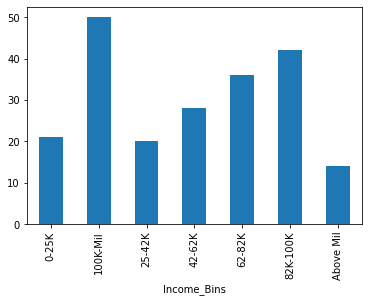

In [135]:
veri_pivot ('Income_Bins', loans_data)['Verified%'].plot.bar()
plt.show()

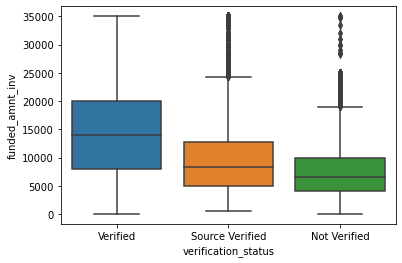

In [136]:
sns.boxplot(x='verification_status', y='funded_amnt_inv', data=loans_data)
plt.show()

> <font color=red> NOTE: </font><br />
> <p> <font color=blue> Surprisingly, there are more defaults for verified cases </font>  
> <p> <font color=blue> As had been noted earlier, higher loan amounts are verified more, hence we see the above trend </font>  

#### <font color=blue> Step 6.6 </font> Purpose against Loan Status
> <font color=blue> purpose : A category provided by the borrower for the loan request. 

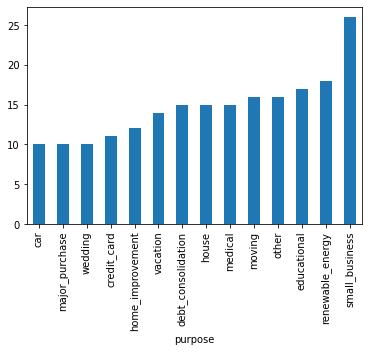

In [137]:
pur = status_pivot ('purpose', loans_data)
pur.sort_values (by='Charged Off%')['Charged Off%'].plot.bar()
plt.show()

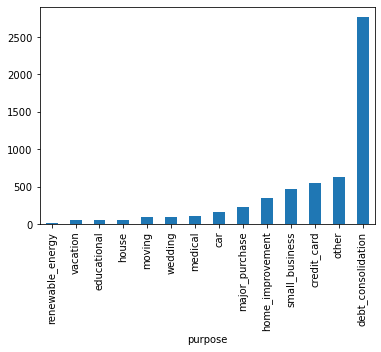

In [138]:
pur.sort_values (by='Charged Off')['Charged Off'].plot.bar()
plt.show()

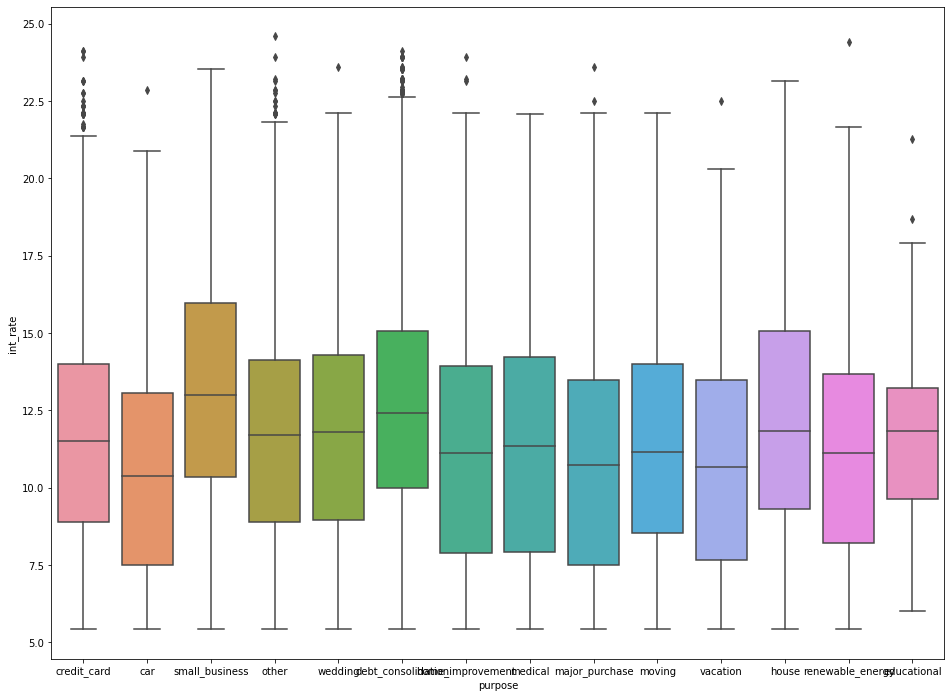

In [139]:
plt.figure (figsize=(16,12))
sns.boxplot(x='purpose', y='int_rate', data=loans_data)
plt.show()

> <font color=red> NOTE: </font>
> <p> <font color=blue> Small business, Renewable Energy and Education loan has the highest rate of charge off </font>
> <p> <font color=blue> Renewable Energy and Education loan seem to have lower interest rate, indicating that they are cheaper. Perhaps this is due to government policies to promote these loans. Perhaps, this is also the reason, that there are more defaults in these two</font>

> <font color=red> CONCLUSION: </font>
> <p> <font color=blue> LC should be wary of small business and debt consolidation loans. Also, Renewable Energy and Educational Loan </font>
> <p> <font color=blue> LC can consider setting interest rate based on the loan purpose, particularly education and renewable energy loans </font>

#### <font color=blue> Step 6.7 </font> Publicly Records and Publicly Recorded Bankruptcies against Loan Status
> <p> <font color=blue> pub_rec: This is similar to CIBIL records, where we can find if the borrower has defaulted with some other bank
> <p> <font color=blue> pub_rec_bankruptcies : Number of public record bankruptcies,Clear Trend. Higher the bankruptcies, higher the defaults

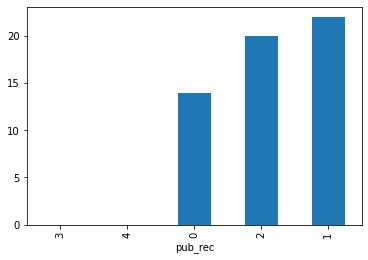

In [140]:
pr = status_pivot ('pub_rec', loans_data)
pr.sort_values (by='Charged Off%')['Charged Off%'].plot.bar()
plt.show()

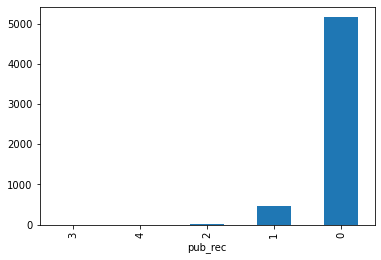

In [141]:
pr.sort_values (by='Charged Off')['Charged Off'].plot.bar()
plt.show()

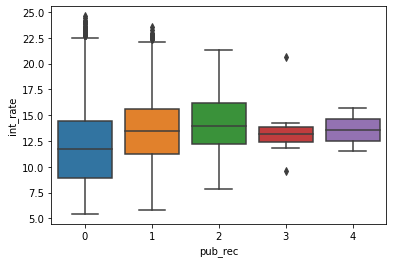

In [142]:
sns.boxplot(x='pub_rec', y='int_rate', data=loans_data)
plt.show()

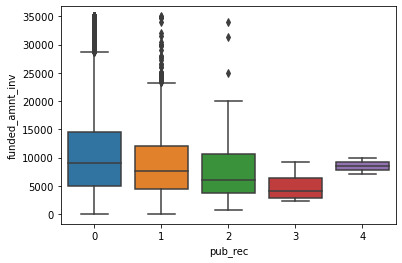

In [143]:
sns.boxplot(x='pub_rec', y='funded_amnt_inv', data=loans_data)
plt.show()

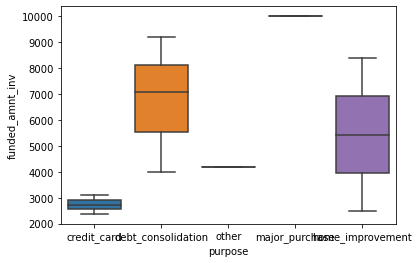

In [144]:
sns.boxplot(x='purpose', y='funded_amnt_inv', data=loans_data[loans_data['pub_rec']>2])
plt.show()

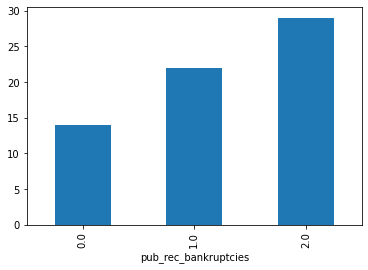

In [145]:
status_pivot ('pub_rec_bankruptcies', loans_data)['Charged Off%'].plot.bar()
plt.show()

> <font color=red> NOTE: </font>
> <p> <font color=blue> Higher the Public Record Bankruptices, higher the defaults. This trend is not so straightforwar in the case of public records. The reason is that for higher public records, the loan amounts are low and for purposes that are known to be safer as seen earlier </font>

> <font color=red> CONCLUSION: </font>
> <p> <font color=blue> LC should be wary of public records or bankruptcies. Higher public records or bankruptcies, higher the risk </font>


#### <font color=blue> Step 6.8 </font> Loan Issue Date against Loan Status
> <p> <font color=blue> issue_d : The month which the loan was funded

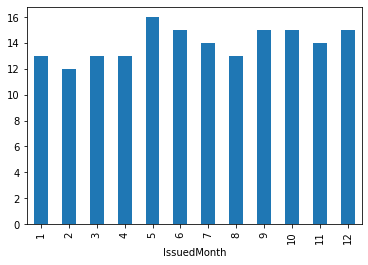

In [146]:
iM = status_pivot ('IssuedMonth', loans_data)
iM.sort_values (by='IssuedMonth')['Charged Off%'].plot.bar()
plt.show()

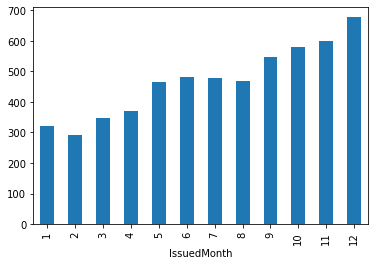

In [147]:
iM.sort_values (by='IssuedMonth')['Charged Off'].plot.bar()
plt.show()

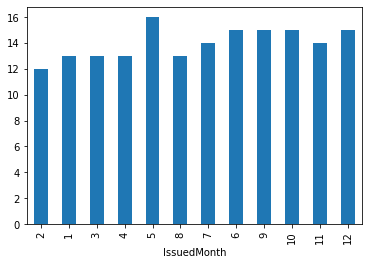

In [148]:
iM.sort_values (by='Charged Off')['Charged Off%'].plot.bar()
plt.show()

> <font color=red> NOTE: </font><br />
> <p> <font color=blue> No discernible trend in terms of defaults

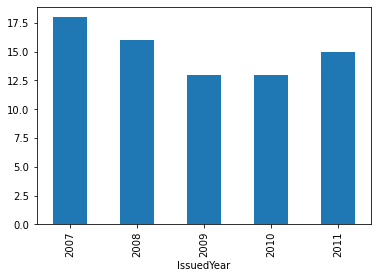

In [149]:
iY = status_pivot ('IssuedYear', loans_data)
iY.sort_values (by='IssuedYear')['Charged Off%'].plot.bar()
plt.show()

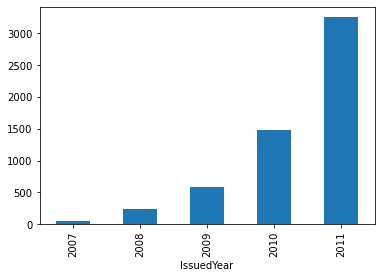

In [150]:
iY.sort_values (by='IssuedYear')['Charged Off'].plot.bar()
plt.show()

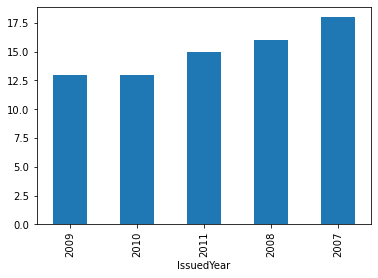

In [151]:
iY.sort_values (by='Charged Off%')['Charged Off%'].plot.bar()
plt.show()

> <font color=red> NOTE: </font><br />
> <p> <font color=blue> No discernible trend in terms of defaults, which can be used to predict future course of action

#### <font color=blue> Step 6.9 </font>  Zip Code and State against Loan Status
> <p> <font color=blue> zip_code: The zip code of the borrower's location address
> <p> <font color=blue> addr_state: The state provided by the borrower in the loan application

In [152]:
zc = status_pivot ('zip_code', loans_data)

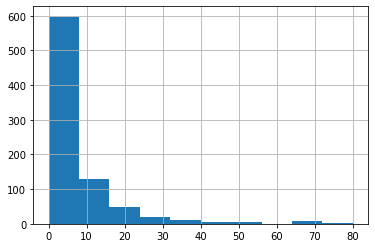

In [153]:
zc['Charged Off'].hist(bins=10)
plt.show()

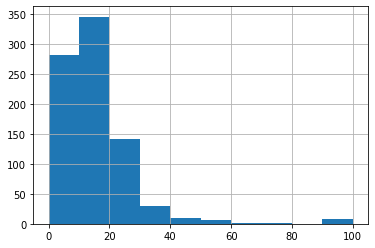

In [154]:
zc['Charged Off%'].hist(bins=10)
plt.show()

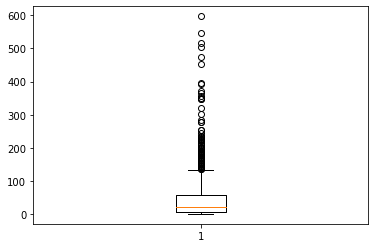

In [155]:
plt.boxplot (zc[['Total']])
plt.show()

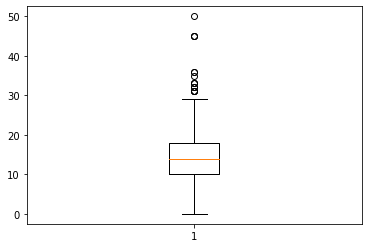

In [156]:
plt.boxplot (zc['Charged Off%'][zc['Total']>10])
plt.show()

In [157]:
zc[(zc['Charged Off%']>30) & (zc['Total']>10)].sort_values (by='Charged Off')

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off%,Current%,Fully Paid%,Total%
zip_code,,,,,,,,
177xx,4.0,0.0,9.0,13.0,31.0,0.0,69.0,100.0
187xx,4.0,0.0,9.0,13.0,31.0,0.0,69.0,100.0
253xx,4.0,0.0,7.0,11.0,36.0,0.0,64.0,100.0
570xx,4.0,0.0,9.0,13.0,31.0,0.0,69.0,100.0
534xx,5.0,0.0,11.0,16.0,31.0,0.0,69.0,100.0
611xx,5.0,1.0,8.0,14.0,36.0,7.0,57.0,100.0
719xx,5.0,0.0,6.0,11.0,45.0,0.0,55.0,100.0
744xx,5.0,0.0,6.0,11.0,45.0,0.0,55.0,100.0
808xx,5.0,0.0,6.0,11.0,45.0,0.0,55.0,100.0


> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> The above list of districts where the charged off % is higher than 30%, are risky districts

In [158]:
zc[(zc['Charged Off%']<5) & (zc['Total']>10)].sort_values (by='Charged Off')

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off%,Current%,Fully Paid%,Total%
zip_code,,,,,,,,
978xx,0.0,0.0,11.0,11.0,0.0,0.0,100.0,100.0
665xx,0.0,1.0,16.0,17.0,0.0,6.0,94.0,100.0
712xx,0.0,0.0,12.0,12.0,0.0,0.0,100.0,100.0
748xx,0.0,0.0,11.0,11.0,0.0,0.0,100.0,100.0
196xx,0.0,0.0,19.0,19.0,0.0,0.0,100.0,100.0
185xx,0.0,0.0,19.0,19.0,0.0,0.0,100.0,100.0
260xx,0.0,0.0,19.0,19.0,0.0,0.0,100.0,100.0
813xx,0.0,0.0,15.0,15.0,0.0,0.0,100.0,100.0
138xx,0.0,0.0,14.0,14.0,0.0,0.0,100.0,100.0


> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> The above list of districts where the charged off % is 0, are low risk districts

In [159]:
loans_data['addr_state'].nunique()

50

In [160]:
st = status_pivot ('addr_state', loans_data)

In [161]:
st[(st['Charged Off%']>30) & (st['Total']>10)].sort_values (by='Charged Off')

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off%,Current%,Fully Paid%,Total%
addr_state,,,,,,,,


In [162]:
st[(st['Charged Off%']<5) & (st['Total']>10)].sort_values (by='Charged Off')

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off%,Current%,Fully Paid%,Total%
addr_state,,,,,,,,


In [163]:
st.sort_values (by='Charged Off%')

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off%,Current%,Fully Paid%,Total%
addr_state,,,,,,,,
ME,0.0,0.0,3.0,3.0,0.0,0.0,100.0,100.0
IN,0.0,0.0,9.0,9.0,0.0,0.0,100.0,100.0
IA,0.0,0.0,5.0,5.0,0.0,0.0,100.0,100.0
WY,4.0,3.0,76.0,83.0,5.0,4.0,92.0,100.0
DC,15.0,3.0,196.0,214.0,7.0,1.0,92.0,100.0
DE,12.0,1.0,101.0,114.0,11.0,1.0,89.0,100.0
VT,6.0,1.0,47.0,54.0,11.0,2.0,87.0,100.0
KS,31.0,16.0,224.0,271.0,11.0,6.0,83.0,100.0
AR,27.0,10.0,208.0,245.0,11.0,4.0,85.0,100.0


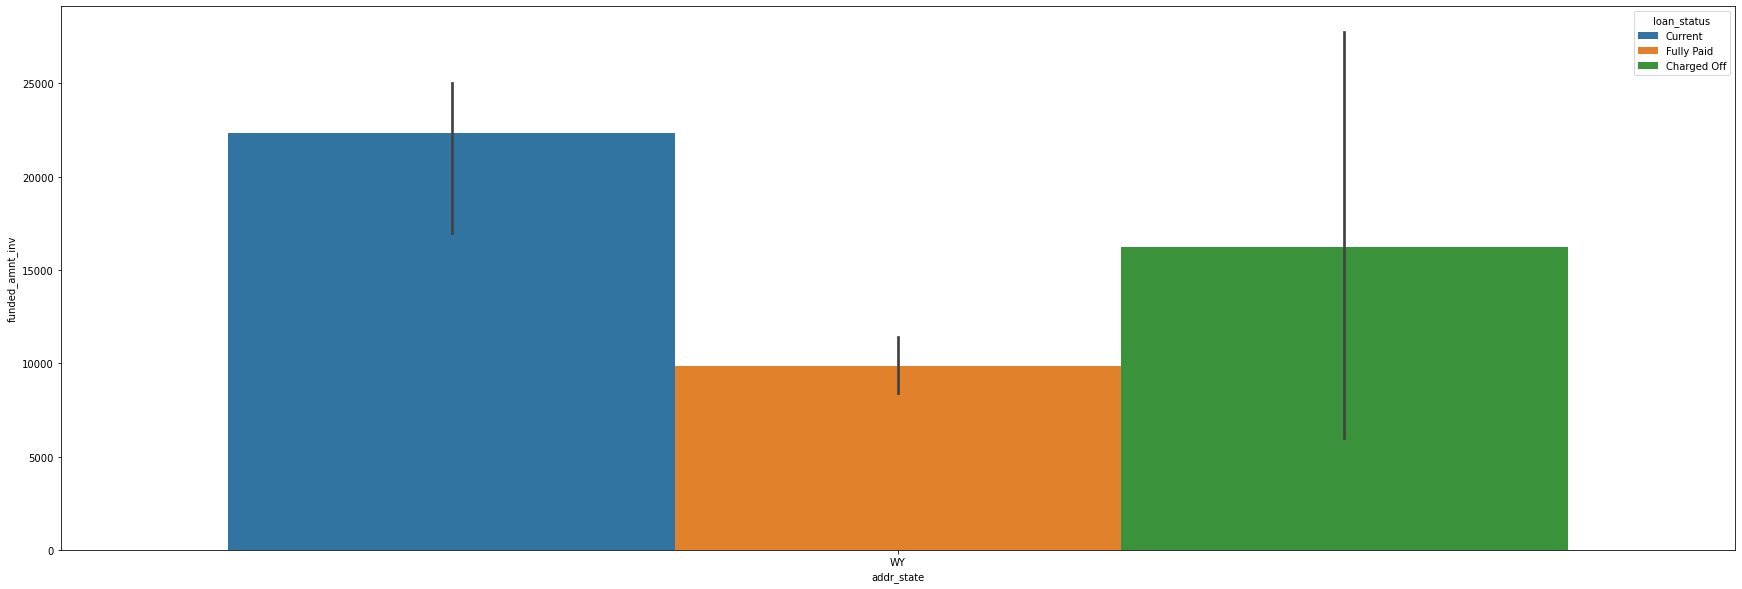

In [184]:
plt.figure (figsize=(30,10))
sns.barplot(x='addr_state', y='funded_amnt_inv', hue='loan_status', data=loans_data[loans_data['addr_state']=='WY'])
plt.show()

> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> The state of NE and NV are the highest risk.
> <p> <font color=blue> The states of IA, IN, ME and DC are low risk
> <p> <font color=blue> Although WY seems to be safe, on further analysis, it turns out that the defaulted loans are of higher value than fully paid

#### <font color=blue> Step 6.10 </font> Number of Open Accounts against Loan Status

##### open_acc : The number of open credit lines in the borrower's credit file.

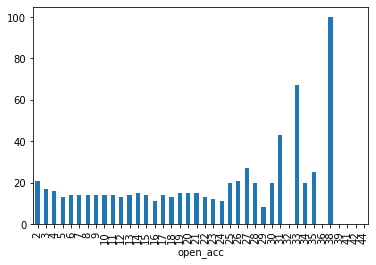

In [165]:
oa = status_pivot ('open_acc', loans_data)
oa.sort_values (by='open_acc')['Charged Off%'].plot.bar()
plt.show()

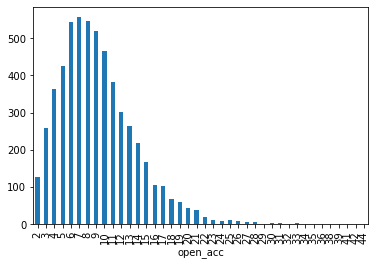

In [166]:
oa.sort_values (by='open_acc')['Charged Off'].plot.bar()
plt.show()

> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> Not much of a steady pattern here to predict

#### <font color=blue> Step 6.11 </font> DTI (Debt to Income Ratio) against Loan Status
> dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

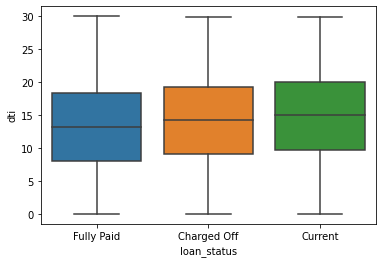

In [167]:
sns.boxplot(x='loan_status', y='dti', data=loans_data)
plt.show()

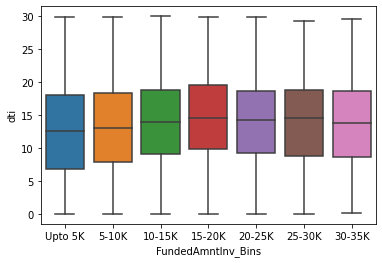

In [168]:
sns.boxplot(x='FundedAmntInv_Bins', y='dti', data=loans_data)
plt.show()

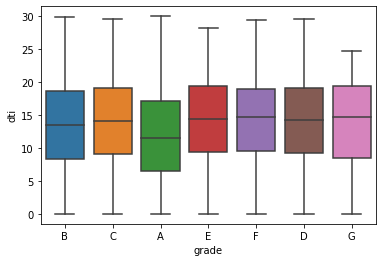

In [169]:
sns.boxplot(x='grade', y='dti', data=loans_data)
plt.show()

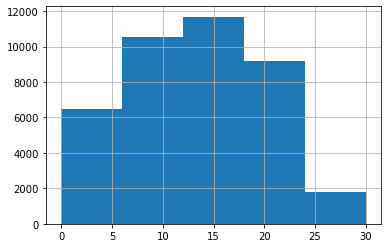

In [170]:
loans_data['dti'].hist(bins=5)
plt.show()

In [171]:
dti_labels = ['0-6%', '6-12%', '12-18%', '18-24%', '24-30%']             
loans_data['Dti_Bins'] = pd.cut (loans_data['dti'], bins=5, labels=dti_labels)

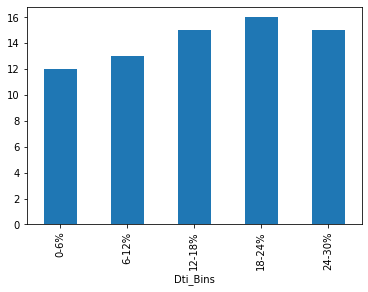

In [172]:
status_pivot ('Dti_Bins', loans_data)['Charged Off%'].plot.bar()
plt.show()

> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> Not much of a steady pattern here to predict

#### <font color=blue> Step 6.12 </font> Inquiry Against Last 6 months against Loan Status

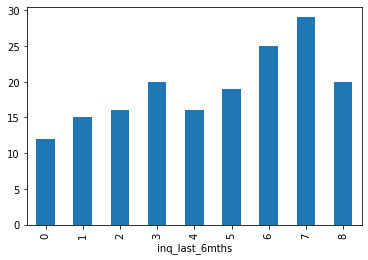

In [173]:
li = status_pivot ('inq_last_6mths', loans_data)
li.sort_values (by='inq_last_6mths', ascending=True)['Charged Off%'].plot.bar()
plt.show()

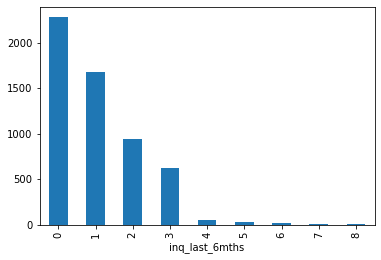

In [174]:
li.sort_values (by='inq_last_6mths', ascending=True)['Charged Off'].plot.bar()
plt.show()

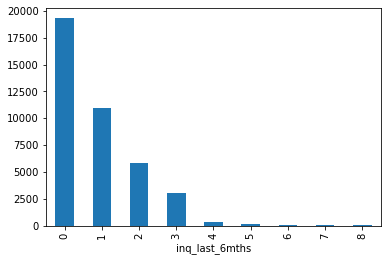

In [175]:
li.sort_values (by='inq_last_6mths', ascending=True)['Total'].plot.bar()
plt.show()

> <font color=red> CONCLUSION: </font><br />
> <p> <font color=blue> Although not steady, but there is a trend that more inquires mean more chances of default, but there are very few loans if inquires increase

#### END of the Notebook